### Importing libraries and reading data

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_percentage_error
import holidays
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


df = pd.read_csv("monthly_data.csv")

In [243]:
import pandas as pd

# Assuming your dataframe is named 'df'
mapping = {
    120004096: "Product1",
    120009814: "Product2",
    120009816: "Product3",
    120010342: "Product4",
    120010566: "Product5",
    120010970: "Product6",
    120011556: "Product7",
    120011782: "Product8",
    120012154: "Product9",
    120012606: "Product10",
    120014486: "Product11",
    120014488: "Product12",
    120015842: "Product13",
    120015996: "Product14"
}

df['ID_material'] = df['ID_material'].map(mapping)

KeyError: 'ID_material'

### Preparing the data for the product we want

In [248]:
df = df[df["ID_material"] == "Product6"]
df = df.drop(columns="ID_material")
df.head(3)

,ID_material,Year,Season,MonthName,Units,Number_Of_Holidays_In_That_Month_SPAIN,GDP_Past_Quarter_Change,PreviousUnemploymentQuarterAmmount,Months_Since_Material_Release,Absolute_Previous GDP Quarter Change
0,120004096,2017,Winter,January,600.0,0,0.8,4255.0,0,0.8
1,120004096,2017,Winter,February,300.0,0,0.8,4255.0,1,0.8
2,120004096,2017,Spring,March,540.0,0,0.8,4255.0,2,0.8


In [ ]:
categorical_cols = ['MonthName',"Season"]
numerical_cols = ["Number_Of_Holidays_In_That_Month_SPAIN","GDP_Past_Quarter_Change","PreviousUnemploymentQuarterAmmount","Months_Since_Material_Release","Absolute_Previous GDP Quarter Change"]

### Creating Train and Test

In [244]:
# Filter the data for the last month of 2022 (August)
test_df = df[(df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September']))]

# Separate the features and target variable for the test set
X_test = test_df.drop(['Units'], axis=1)
y_test = test_df['Units']

# Filter the data for training (excluding the last month of 2022)
train_df = df[~((df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September'])))]

# Separate the features and target variable for training
X_train = train_df.drop(['Units'], axis=1)
y_train = train_df['Units']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [246]:
df

,Year,Season,MonthName,Units,Number_Of_Holidays_In_That_Month_SPAIN,GDP_Past_Quarter_Change,PreviousUnemploymentQuarterAmmount,Months_Since_Material_Release,Absolute_Previous GDP Quarter Change
122,2019,Spring,March,1290.0,0,0.7,3304.3,0,0.7
127,2019,Spring,April,4620.0,2,0.6,3354.2,1,0.6
143,2019,Spring,May,4410.0,0,0.6,3354.2,2,0.6
151,2019,Summer,June,11460.0,0,0.6,3354.2,3,0.6
159,2019,Summer,July,4920.0,0,0.4,3230.6,4,0.4
166,2019,Summer,August,4860.0,1,0.4,3230.6,5,0.4
177,2019,Autumn,September,6780.0,0,0.4,3230.6,6,0.4
193,2019,Autumn,October,4500.0,2,0.3,3214.4,7,0.3
194,2019,Autumn,November,5520.0,0,0.3,3214.4,8,0.3
209,2019,Winter,December,7080.0,4,0.3,3214.4,9,0.3


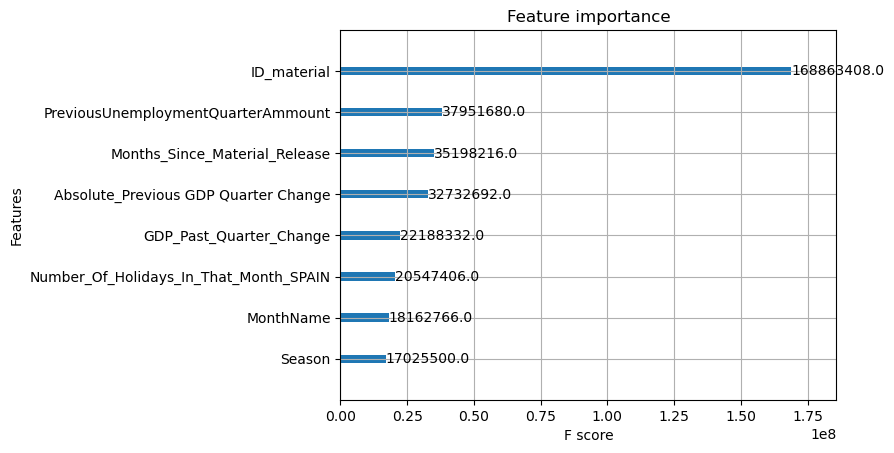

In [249]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
categorical_cols = ['MonthName',"Season","ID_material"]

# Convert categorical columns to categorical data types
df[categorical_cols] = df[categorical_cols].astype('category')

# Separate the features and target variable
X = df[categorical_cols + numerical_cols]
y = df['Units']

# Create an XGBoost DMatrix for training
dtrain = xgb.DMatrix(X, label=y, enable_categorical=True)

# Define the parameters for the XGBoost Regressor
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',  # Evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of each tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'seed': 42  # Random seed for reproducibility
}

# Train the XGBoost Regressor
model = xgb.train(params, dtrain, num_boost_round=100)

# Plot the feature importance
xgb.plot_importance(model, importance_type='gain')
plt.show()


# LIGHTGBM

In [220]:
# Fitting LightGBM model using LOOCV
model = lgb.LGBMRegressor()
cv = LeaveOneOut()
cv_scores = []
for train_index, val_index in cv.split(X_train_processed):
    X_train_fold = X_train_processed[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train_processed[val_index]
    y_val_fold = y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_val_pred = model.predict(X_val_fold)
    cv_score = mean_absolute_percentage_error(y_val_fold, y_val_pred)
    cv_scores.append(cv_score)
    
    if len(cv_scores) > 6:
        cv_scores.pop(0)

cv_mape = sum(cv_scores) / len(cv_scores)

# Training the final model
model.fit(X_train_processed, y_train)

# Predicting on the test set
y_test_pred = model.predict(X_test_processed)

# Calculating MAPE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("MAPE on LOOCV sets:", cv_mape)
print("MAPE on the test set:", test_mape)

MAPE on LOOCV sets: 0.6447274470641885
MAPE on the test set: 0.570917522107275


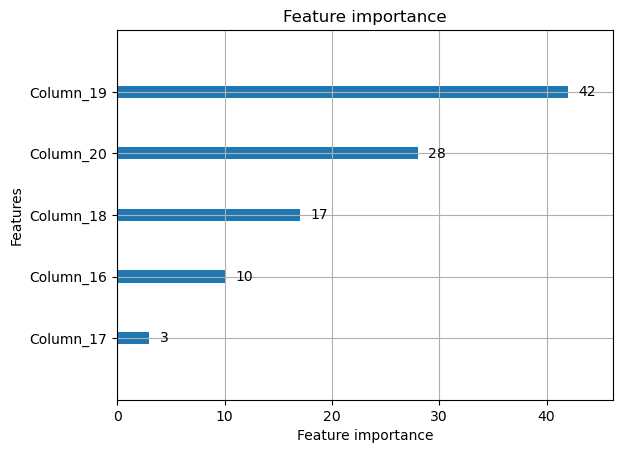

In [221]:
# Plotting feature importance
lgb.plot_importance(model, max_num_features=8)  # Set max_num_features as per your preference
plt.show()

# KNN

In [208]:
# Filter the data for the last month of 2022 (August)
test_df = df[(df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September']))]

# Separate the features and target variable for the test set
X_test = test_df.drop(['Units'], axis=1)
y_test = test_df['Units']

# Filter the data for training (excluding the last month of 2022)
train_df = df[~((df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September'])))]

# Separate the features and target variable for training
X_train = train_df.drop(['Units'], axis=1)
y_train = train_df['Units']

# Preprocessing: One-Hot Encoding for categorical features, Standard Scaling for numerical features

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fitting LightGBM model using LOOCV
model = KNeighborsRegressor()
cv = LeaveOneOut()
cv_scores = []
for train_index, val_index in cv.split(X_train_processed):
    X_train_fold = X_train_processed[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train_processed[val_index]
    y_val_fold = y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_val_pred = model.predict(X_val_fold)
    cv_score = mean_absolute_percentage_error(y_val_fold, y_val_pred)
    cv_scores.append(cv_score)
    
    if len(cv_scores) > 6:
        cv_scores.pop(0)

cv_mape = sum(cv_scores) / len(cv_scores)

# Training the final model
model.fit(X_train_processed, y_train)

# Predicting on the test set
y_test_pred = model.predict(X_test_processed)

# Calculating MAPE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("MAPE on LOOCV sets:", cv_mape)
print("MAPE on the test set:", test_mape)

MAPE on LOOCV sets: 0.6228531721374914
MAPE on the test set: 0.2971985030571369


# SVR

In [209]:
# Filter the data for the last month of 2022 (August)
test_df = df[(df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September']))]

# Separate the features and target variable for the test set
X_test = test_df.drop(['Units'], axis=1)
y_test = test_df['Units']

# Filter the data for training (excluding the last month of 2022)
train_df = df[~((df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September'])))]

# Separate the features and target variable for training
X_train = train_df.drop(['Units'], axis=1)
y_train = train_df['Units']

# Preprocessing: One-Hot Encoding for categorical features, Standard Scaling for numerical features

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fitting LightGBM model using LOOCV
model = SVR()
cv = LeaveOneOut()
cv_scores = []
for train_index, val_index in cv.split(X_train_processed):
    X_train_fold = X_train_processed[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train_processed[val_index]
    y_val_fold = y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_val_pred = model.predict(X_val_fold)
    cv_score = mean_absolute_percentage_error(y_val_fold, y_val_pred)
    cv_scores.append(cv_score)
    
    if len(cv_scores) > 6:
        cv_scores.pop(0)

cv_mape = sum(cv_scores) / len(cv_scores)

# Training the final model
model.fit(X_train_processed, y_train)

# Predicting on the test set
y_test_pred = model.predict(X_test_processed)

# Calculating MAPE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("MAPE on LOOCV sets:", cv_mape)
print("MAPE on the test set:", test_mape)

MAPE on LOOCV sets: 0.5600341690011178
MAPE on the test set: 0.6289457641070709


# Linear Regression

In [210]:
# Filter the data for the last month of 2022 (August)
test_df = df[(df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September']))]

# Separate the features and target variable for the test set
X_test = test_df.drop(['Units'], axis=1)
y_test = test_df['Units']

# Filter the data for training (excluding the last month of 2022)
train_df = df[~((df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September'])))]

# Separate the features and target variable for training
X_train = train_df.drop(['Units'], axis=1)
y_train = train_df['Units']

# Preprocessing: One-Hot Encoding for categorical features, Standard Scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fitting LightGBM model using LOOCV
model = LinearRegression()
cv = LeaveOneOut()
cv_scores = []
for train_index, val_index in cv.split(X_train_processed):
    X_train_fold = X_train_processed[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train_processed[val_index]
    y_val_fold = y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_val_pred = model.predict(X_val_fold)
    cv_score = mean_absolute_percentage_error(y_val_fold, y_val_pred)
    cv_scores.append(cv_score)
    
    if len(cv_scores) > 6:
        cv_scores.pop(0)

cv_mape = sum(cv_scores) / len(cv_scores)

# Training the final model
model.fit(X_train_processed, y_train)

# Predicting on the test set
y_test_pred = model.predict(X_test_processed)

# Calculating MAPE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("MAPE on LOOCV sets:", cv_mape)
print("MAPE on the test set:", test_mape)

MAPE on LOOCV sets: 0.6111301745839537
MAPE on the test set: 0.9503761572775926


# Random Forest Regressor

In [211]:
# Filter the data for the last month of 2022 (August)
test_df = df[(df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September']))]

# Separate the features and target variable for the test set
X_test = test_df.drop(['Units'], axis=1)
y_test = test_df['Units']

# Filter the data for training (excluding the last month of 2022)
train_df = df[~((df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September'])))]

# Separate the features and target variable for training
X_train = train_df.drop(['Units'], axis=1)
y_train = train_df['Units']

# Preprocessing: One-Hot Encoding for categorical features, Standard Scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fitting LightGBM model using LOOCV
model = RandomForestRegressor()
cv = LeaveOneOut()
cv_scores = []
for train_index, val_index in cv.split(X_train_processed):
    X_train_fold = X_train_processed[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train_processed[val_index]
    y_val_fold = y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_val_pred = model.predict(X_val_fold)
    cv_score = mean_absolute_percentage_error(y_val_fold, y_val_pred)
    cv_scores.append(cv_score)
    
    if len(cv_scores) > 6:
        cv_scores.pop(0)

cv_mape = sum(cv_scores) / len(cv_scores)

# Training the final model
model.fit(X_train_processed, y_train)

# Predicting on the test set
y_test_pred = model.predict(X_test_processed)

# Calculating MAPE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("MAPE on LOOCV sets:", cv_mape)
print("MAPE on the test set:", test_mape)

MAPE on LOOCV sets: 0.49748605647521754
MAPE on the test set: 0.11566206845413576


# XGBoost Regressor


In [212]:
# Filter the data for the last month of 2022 (August)
test_df = df[(df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September']))]

# Separate the features and target variable for the test set
X_test = test_df.drop(['Units'], axis=1)
y_test = test_df['Units']

# Filter the data for training (excluding the last month of 2022)
train_df = df[~((df['Year'] == 2022) & (df['MonthName'].isin(['August', 'September'])))]

# Separate the features and target variable for training
X_train = train_df.drop(['Units'], axis=1)
y_train = train_df['Units']

# Preprocessing: One-Hot Encoding for categorical features, Standard Scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fitting LightGBM model using LOOCV
model = GradientBoostingRegressor()
cv = LeaveOneOut()
cv_scores = []
for train_index, val_index in cv.split(X_train_processed):
    X_train_fold = X_train_processed[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train_processed[val_index]
    y_val_fold = y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_val_pred = model.predict(X_val_fold)
    cv_score = mean_absolute_percentage_error(y_val_fold, y_val_pred)
    cv_scores.append(cv_score)
    
    if len(cv_scores) > 6:
        cv_scores.pop(0)

cv_mape = sum(cv_scores) / len(cv_scores)

# Training the final model
model.fit(X_train_processed, y_train)

# Predicting on the test set
y_test_pred = model.predict(X_test_processed)

# Calculating MAPE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("MAPE on LOOCV sets:", cv_mape)
print("MAPE on the test set:", test_mape)

MAPE on LOOCV sets: 0.401343892185489
MAPE on the test set: 0.2374480079179451


Hypertuning SVR Parameters

In [213]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Define the parameter grid for SVR
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'epsilon': [0.001, 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 0.01],
#     'degree': [2, 3, 4, 5],
#     'coef0': [0.0, 0.1, 0.5, 1.0]
# }

# # Create the SVR model
# model = SVR()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_percentage_error')

# # Perform the grid search
# grid_search.fit(X_train_processed, y_train)

# # Get the best model and its parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Training the final model
# best_model.fit(X_train_processed, y_train)

# # Predicting on the test set
# y_test_pred = best_model.predict(X_test_processed)

# # Calculating MAPE on the test set
# test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# print("Best parameters:", best_params)
# print("MAPE on the test set:", test_mape)

1 - 0.09 / 0.32 WITHOUT ECONOMIC DATA
1.- 0.08/ 0.31 WITH ECONOMIC DATA

2 - WITH = 0.26 / 0.8
2.- WITHOUT = 
3 - 
4 -